In [26]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score  # Works only for classification task
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # To avoid warning messages.

In [27]:
data = pd.read_csv("titanic_data.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
# First, we have to remove columns which are not needed to predict.
# We will consider only the next ones. The target here is 'Survived' column.
df = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [4]:
# Next, we clean those columns with NaN values, whether removing or replacing them.

# First, we count the number of NaN values in each column.
df_NaN = df.isna().sum()
df_NaN

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
# We can observe that only the columns 'Age' and 'Embarked' have NaN values.
# We can start replacing the NaN values by the mean in the 'Age' column.

mean_age = df.Age.mean()
df.Age.fillna(value=mean_age, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [6]:
# Now, we can replace the NaN values by the mode (most frequent value) in the 'Embarked' column.
embarked_mode = df.Embarked.mode()[0]
df.Embarked.fillna(value=embarked_mode, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [7]:
# Finally, we can count again the number of NaN values in the whole dataframe.
df_NaN = df.isna().sum()
df_NaN

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
# The next step is convert the like-string columns in numerical (e.g. for 'Sex' and 'Embarked')
LE = LabelEncoder()

df['Sex_idx'] = LE.fit_transform(df["Sex"])
df['Embarked_idx'] = LE.fit_transform(df["Embarked"])

# New columns were added replacing numerically (by int numbers) to the like-string ones.
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_idx,Embarked_idx
0,0,3,male,22.000000,1,0,7.2500,S,1,2
1,1,1,female,38.000000,1,0,71.2833,C,0,0
2,1,3,female,26.000000,0,0,7.9250,S,0,2
3,1,1,female,35.000000,1,0,53.1000,S,0,2
4,0,3,male,35.000000,0,0,8.0500,S,1,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,2
887,1,1,female,19.000000,0,0,30.0000,S,0,2
888,0,3,female,29.699118,1,2,23.4500,S,0,2
889,1,1,male,26.000000,0,0,30.0000,C,1,0


In [9]:
# We can create a last dataframe which does not include the like-string columns
df = df.drop(columns=['Sex', 'Embarked'], axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_idx,Embarked_idx
0,0,3,22.000000,1,0,7.2500,1,2
1,1,1,38.000000,1,0,71.2833,0,0
2,1,3,26.000000,0,0,7.9250,0,2
3,1,1,35.000000,1,0,53.1000,0,2
4,0,3,35.000000,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,2
887,1,1,19.000000,0,0,30.0000,0,2
888,0,3,29.699118,1,2,23.4500,0,2
889,1,1,26.000000,0,0,30.0000,1,0


In [10]:
# We can convert the 'Age' column as int-type
df['Age'] = df['Age'].astype(int)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_idx,Embarked_idx
0,0,3,22,1,0,7.2500,1,2
1,1,1,38,1,0,71.2833,0,0
2,1,3,26,0,0,7.9250,0,2
3,1,1,35,1,0,53.1000,0,2
4,0,3,35,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,1,2
887,1,1,19,0,0,30.0000,0,2
888,0,3,29,1,2,23.4500,0,2
889,1,1,26,0,0,30.0000,1,0


In [11]:
# Due to the values in between columns are not very different in magnitude order (~10^0 to ~10^1)
# Then, is not needed a scaling process.

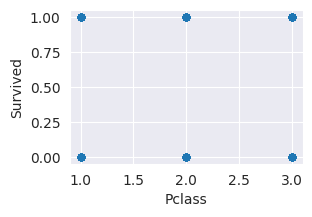

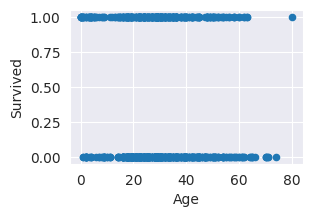

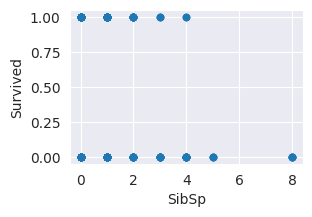

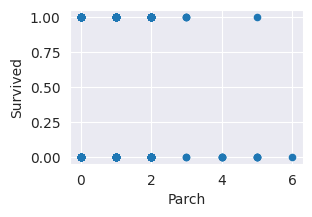

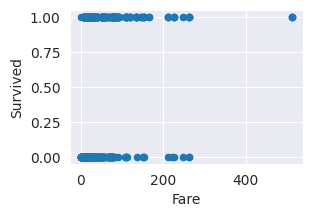

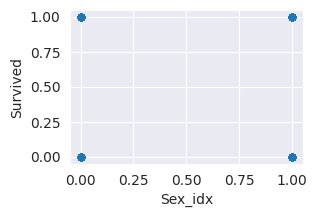

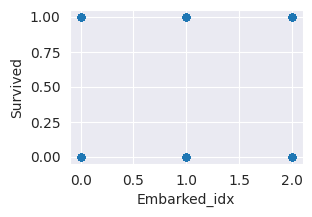

In [12]:
# We can check for outliers in the columns by plotting

for column in df.columns:
    if column != "Survived":
        df.plot.scatter(x=column, y="Survived", figsize=(3, 2))

In [13]:
# We can observe that in the plot "Fare" vs. "Survived", we found an outlier (~500, 1).
# In order to obtain a better model, we can remove this outlier.
df = df.query("Fare < 400")

In [14]:
# Split the data in features (X) and target (y) samples
y = df[['Survived']]
X = df.drop(y, axis=1)

In [15]:
# Now, we split for training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Performing fit
forest = RandomForestClassifier()
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [17]:
# Computing the score of the model, on the training sample
# This means how well did the model fit to the training sample.
score_fit = forest.score(X_train, y_train)
score_fit

0.976056338028169

In [18]:
# Calculating the accuracy score on the test sample
score_accuracy = accuracy_score(y_true=y_test, y_pred=forest.predict(X_test))
score_accuracy

0.8539325842696629

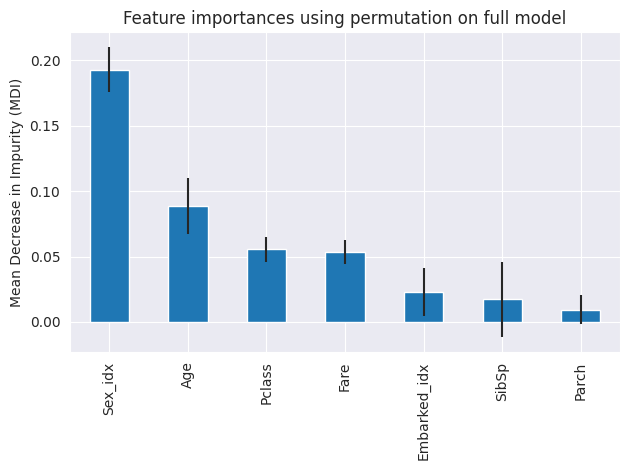

In [19]:
result = permutation_importance(forest, X_test, y_test, n_repeats=100, random_state=42, n_jobs=-1)
forest_importances = pd.Series(result.importances_mean, index=X_train.columns).sort_values(ascending=False)

# Plot of importances
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean Decrease in Impurity (MDI)")
fig.tight_layout()
plt.show()

In [20]:
# The cross validation is applied on the whole sample.
cv_score = cross_val_score(estimator=forest,
                           X=X, y=y.values.ravel(), cv=10, n_jobs=-1)

cv_score_mean = round( cv_score.mean()*100, 2 )
cv_score_std  = round( cv_score.std()*100, 2 )

print(f'({cv_score_mean} +- {cv_score_std})%')

(81.87 +- 5.41)%


This result for the cross validation score shows that the predicting power of our model
is really lower, which means that the model is overfitting. This result is close to that of Accuracy score.

In [21]:
Forest = RandomForestClassifier(n_jobs=-1)

param_grid = {"criterion": ("gini", "entropy"),
              "max_depth": (5, 8, 10, 12),
              "n_estimators": (10, 50, 100, 200),
              }

search = GridSearchCV(estimator=Forest,
                      param_grid=param_grid,
                      scoring="accuracy",
                      cv=5,  # number of crossVal folds.
                      n_jobs=-1) # Using all cores for processing

# Here, we also use cross validation via 'cv' param in GridSearchCV.

# Fit the model evaluating the grid of params
search.fit(X_train, y_train.values.ravel())

# Now, seach class could be used to make predictions, as any other estimator.

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (5, 8, 10, 12),
                         'n_estimators': (10, 50, 100, 200)},
             scoring='accuracy')

In [22]:
print(f'best params: {search.best_params_}')
print(f'best score: {search.best_score_}')

cv_GridScore_mean = round( search.cv_results_["mean_test_score"].mean()*100 , 2)
cv_GridScore_std  = round( search.cv_results_["std_test_score"].mean()*100 , 2)

print(f'mean score: ({cv_GridScore_mean} +- {cv_GridScore_std})')

best params: {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 10}
best score: 0.8408450704225352
mean score: (81.95 +- 2.98)


In [23]:
# What if we select only the three most contributing columns from features.

X_shorted = X[['Sex_idx', 'Age', 'Pclass']]

# Split training and test samples
X_train, X_test, y_train, y_test = train_test_split(X_shorted, y, test_size=0.15)

# We fix the param max_depth = 3 in order to avoid overfiting.
Forest_shorted = RandomForestClassifier(criterion='entropy',
                                        max_depth=3,
                                        n_estimators=100,
                                        n_jobs=-1)

Forest_shorted.fit(X_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=3, n_jobs=-1)

In [24]:
score_fit = Forest_shorted.score(X_train, y_train)
accuracy = accuracy_score(y_true=y_test, y_pred=Forest_shorted.predict(X_test))
print(score_fit, accuracy)

0.8037135278514589 0.835820895522388


In [25]:
# The cross validation is applied on the shorted sample.
cv_score = cross_val_score(estimator=Forest_shorted,
                           X=X_shorted, y=y.values.ravel(), cv=10, n_jobs=-1)

cv_score_mean = round( cv_score.mean()*100, 2 )
cv_score_std  = round( cv_score.std()*100, 2 )

print(f'({cv_score_mean} +- {cv_score_std})%')

(79.74 +- 4.35)%


Now, we can observe that the score_fit, accuracy and the cross_validations_mean are in agreement.